<a href="https://colab.research.google.com/github/HPractor/Iris-Flower/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn.preprocessing import LabelEncoder as le
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [ ]:
a=pandas.read_csv('IRIS.csv')

# **Displaying the dataset**

In [ ]:
# first five rows
a.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
a.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Encoding alphabetical data into numeric form**

In [ ]:
le = le()
le.fit(a["species"])
print(le.classes_)
a["species"]=le.transform(a["species"])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# **Checking for NaN values**

In [ ]:
print("NaN Values in Each Column:")
print(a.isna().sum())

NaN Values in Each Column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# **Checking for duplicate values**

In [ ]:
duplicates = a.duplicated()


In [ ]:
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 3


In this case the duplicates are not removed since they are meaningful and removing them might cause loss in valuable data

# **Visualizing the dataset**

<ipython-input-98-e0faef0e3b3d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a['sepal_length'])
<ipython-input-98-e0faef0e3b3d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a['sepal_width'])
<ipython-input-98-e0faef0e3b3d>:12: UserWarning: 

`distplot` is a deprecated function and will b

Text(0.5, 1.0, 'species')

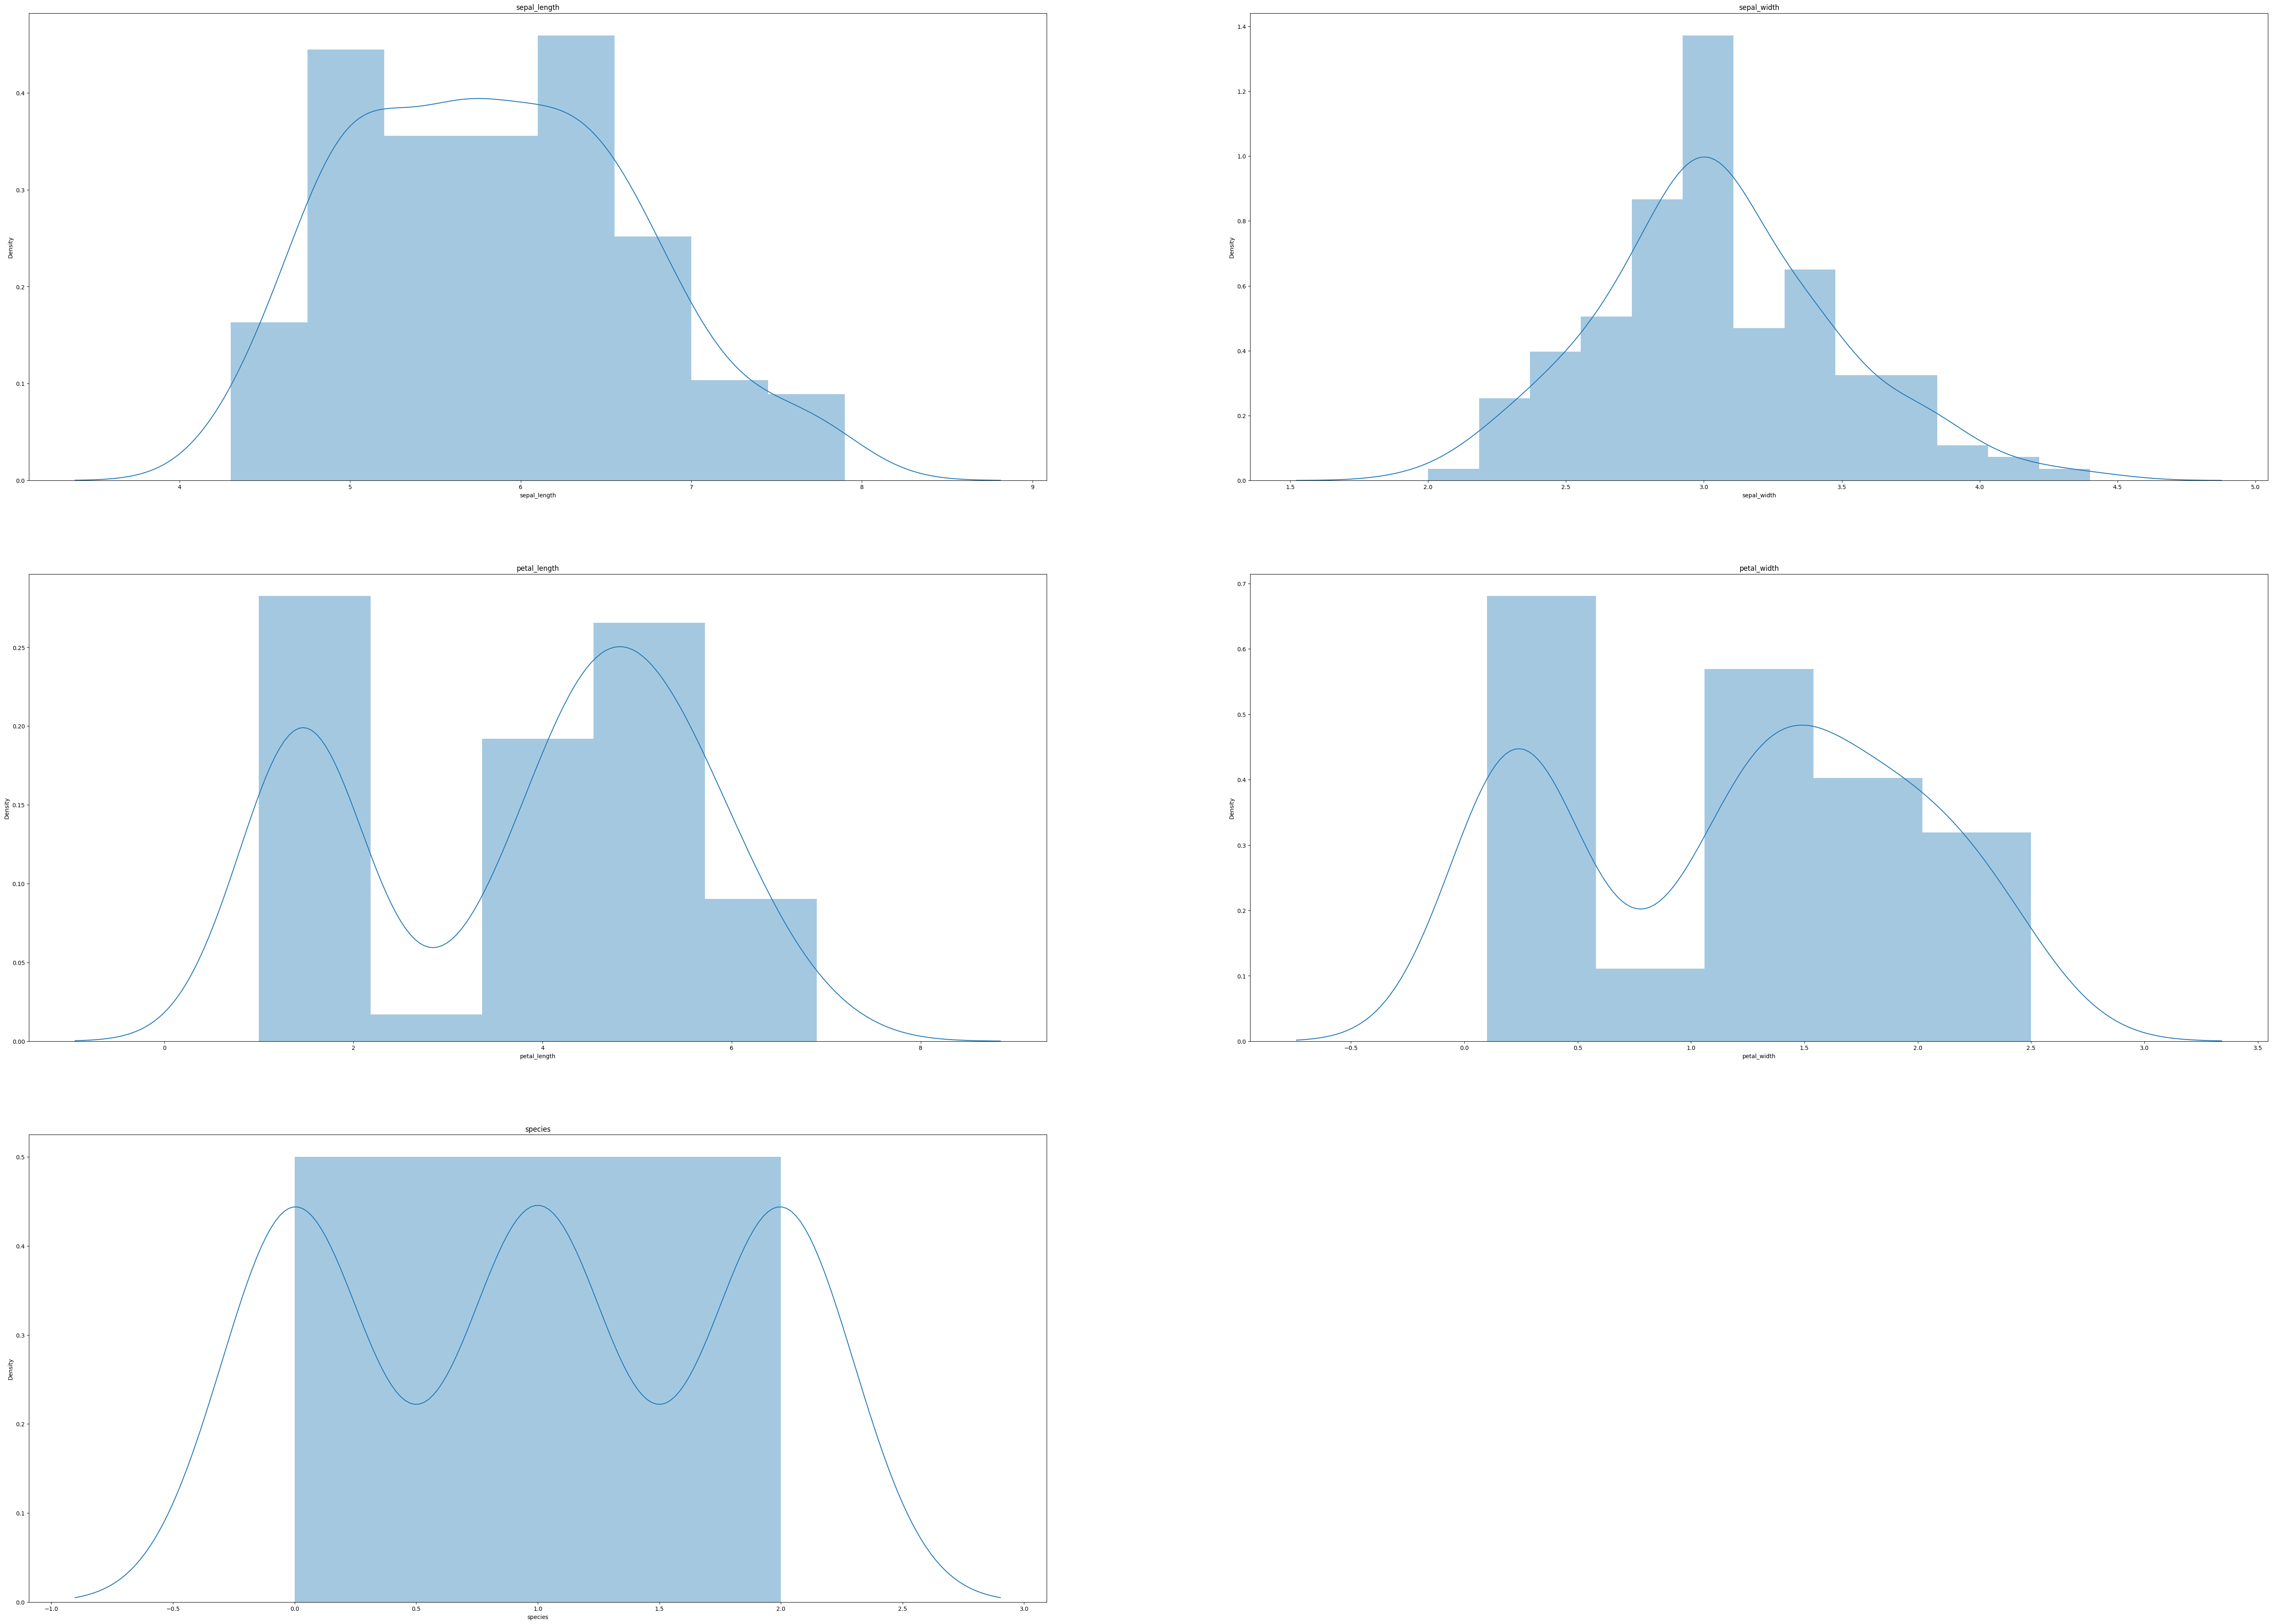

In [ ]:
plt.figure(figsize=[70,50])

plt.subplot(3,2,1)
sns.distplot(a['sepal_length'])
plt.title('sepal_length')

plt.subplot(3,2,2)
sns.distplot(a['sepal_width'])
plt.title('sepal_width')

plt.subplot(3,2,3)
sns.distplot(a['petal_length'])
plt.title('petal_length')

plt.subplot(3,2,4)
sns.distplot(a['petal_width'])
plt.title('petal_width')

plt.subplot(3,2,5)
sns.distplot(a['species'])
plt.title('species')


# **Performing Train Test split**

In [ ]:
train,test=train_test_split(a,test_size=0.3)

In [ ]:
train_x=train.drop(['species'],axis=1)

In [ ]:
train_y=train['species']

In [ ]:
test_x=test.drop(['species'],axis=1)

In [ ]:
test_y=test['species']

# **Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(train_x,train_y)


LogisticRegression(max_iter=10000)

In [ ]:
pred = model.predict(test_x)


In [ ]:
accuracy = accuracy_score(test_y, pred)
cm = confusion_matrix(test_y, pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.9111111111111111
Confusion Matrix:
[[12  0  0]
 [ 0 17  0]
 [ 0  4 12]]


In [ ]:
precision = precision_score(test_y, pred, average='macro') # Add average parameter
print(f'Precision: {precision:.2f}')

Precision: 0.94


In [ ]:
f1 = f1_score(test_y, pred,average='macro')
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.92


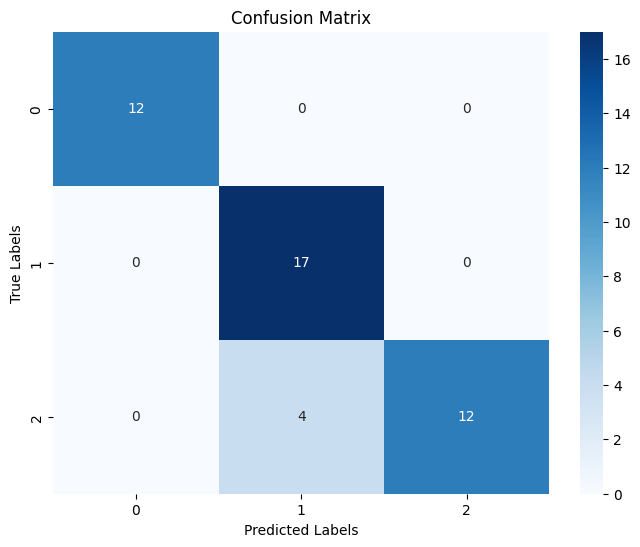

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_y,pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(train_x,train_y)
pred = knn_reg.predict(test_x)


In [ ]:
mse = mean_squared_error(test_y,pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.06


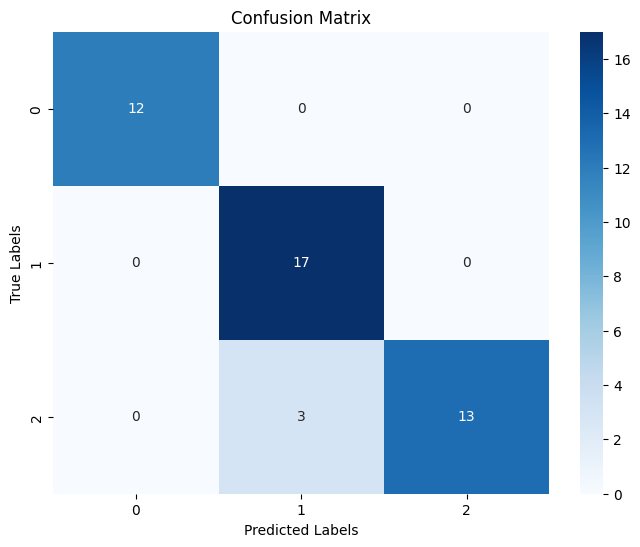

In [ ]:
pred_classes = np.round(pred).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(test_y, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_x, train_y)


RandomForestRegressor(random_state=42)

In [ ]:
pred = model.predict(test_x)

In [ ]:
mse = mean_squared_error(test_y,pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y,pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.055877777777777776
Root Mean Squared Error (RMSE): 0.23638480868655198
R-squared (R²): 0.9090413987138264


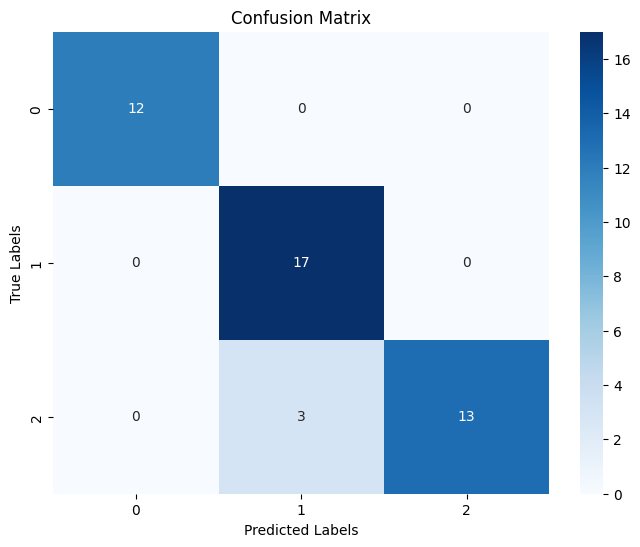

In [ ]:
pred_classes = np.round(pred).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(test_y, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

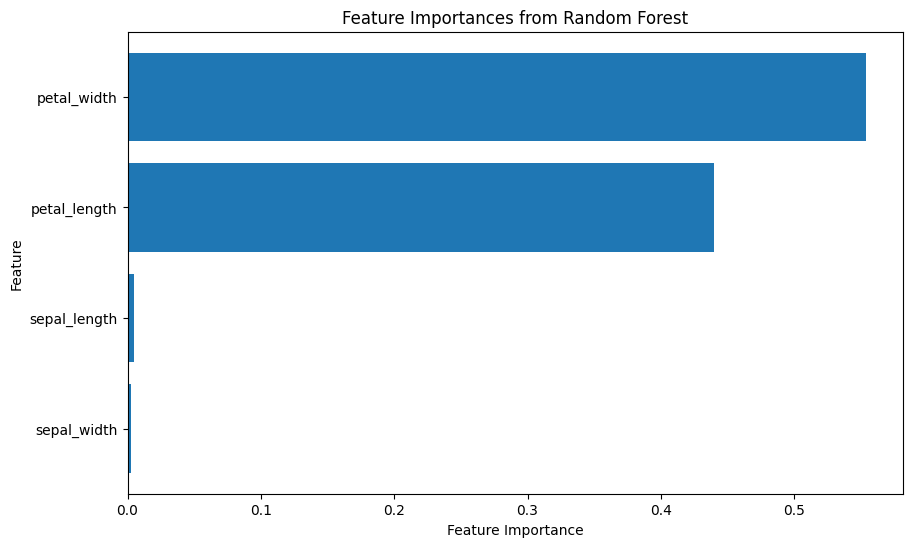

In [ ]:
# Get feature importances
importances = model.feature_importances_

# Use the correct feature names that were used during training
# Assuming 'train_x' contains the correct features used for training
features = train_x.columns

# Create a DataFrame for better visualization
importance_df = pandas.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(train_x,train_y)

SVC()

In [ ]:
pred = model.predict(test_x)
# Evaluate the model
print(confusion_matrix(test_y, pred))
print(classification_report(test_y,pred))

[[12  0  0]
 [ 0 17  0]
 [ 0  4 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.81      1.00      0.89        17
           2       1.00      0.75      0.86        16

    accuracy                           0.91        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45



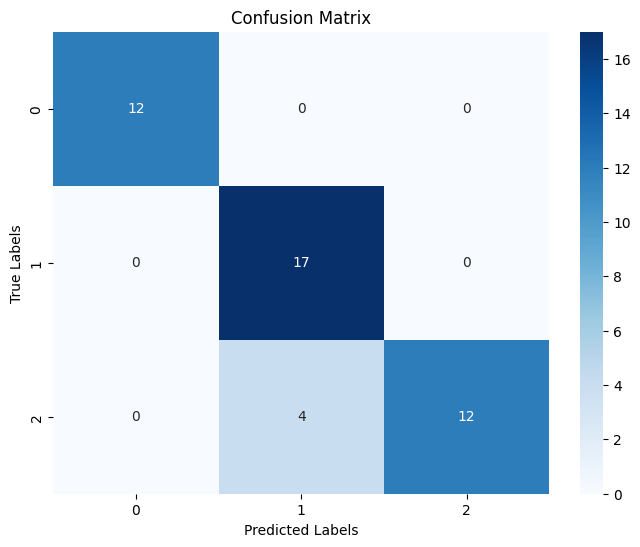

In [ ]:
pred_classes = np.round(pred).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(test_y, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()